In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

In [46]:
N = 30
r = np.linspace(0.1,1,N)
phi = np.linspace(0,2*np.pi,N)
dr = r[1] - r[0]
dphi = phi[1] - phi[0]
lambda_ = dr/dphi
print(lambda_)
print(dr)

0.14323944878270584
0.031034482758620696


In [54]:
def h1(phi):
    
    if phi < np.pi:
        return 100.
    else:
        return 50.

In [56]:
def InitT():
    
    T = np.zeros((N,N))
    
    for i in range(len(phi)):
        T[-1,i] = h1(phi[i])
        
    return T

In [57]:
T = InitT()

In [58]:
def Relajacion(T,r,phi,Nit = int(1e5), omega = 1.3 ,tolerancia = 1e-4):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
       # print(r)
        
        for i in range(1, len(r)-1):
            for j in range(len(phi)):
                
                
                if j == len(phi) - 1:
                    b = 1
                else:
                    b = j+1
                
                
                c = 2 - dr/r[i] + 2*(lambda_/r[i])**2
                
                tmp = T[i+1,j] + (1-dr/r[i])*T[i-1,j] + ((lambda_/r[i])**2)*(T[i,b] + T[i,j-1])
                tmp /= c
                
                # Matriz resta
                r1 = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r1
                
        
                if np.abs(r1) > dmax:
                    dmax = r1
                    
        #print(np.round(T,2))
        if it%40 == 0:
            print(dmax)
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            
            itmax = it
            break
            
    return T,itmax
        

In [59]:
T = InitT()
Tf1,_ =  Relajacion(T,r,phi)

  0%|                                                | 22/100000 [00:00<15:31, 107.32it/s]

65.54835972396414


  0%|                                                | 56/100000 [00:00<15:03, 110.57it/s]

0.9117688467338898


  0%|                                               | 104/100000 [00:00<14:51, 112.10it/s]

0.4470449329555514


  0%|                                               | 139/100000 [00:01<15:05, 110.26it/s]

0.215389711693647


  0%|                                               | 173/100000 [00:01<15:29, 107.44it/s]

0.10278007296732526


  0%|                                               | 217/100000 [00:02<16:14, 102.35it/s]

0.049397016880708126


  0%|                                               | 261/100000 [00:02<16:10, 102.76it/s]

0.023873093397337897


  0%|▏                                               | 292/100000 [00:02<17:10, 96.80it/s]

0.011595310009901284


  0%|▏                                               | 332/100000 [00:03<18:23, 90.33it/s]

0.005650462472958396


  0%|▏                                               | 375/100000 [00:03<16:38, 99.74it/s]

0.0027614022744678834


  0%|▏                                              | 419/100000 [00:04<16:19, 101.69it/s]

0.0013519891680047636


  0%|▏                                              | 453/100000 [00:04<16:18, 101.70it/s]

0.000663109379667759


  0%|▏                                               | 497/100000 [00:04<16:43, 99.19it/s]

0.0003255846956058406


  1%|▎                                              | 540/100000 [00:05<16:02, 103.28it/s]

0.00016002527454830328


  1%|▎                                              | 547/100000 [00:05<16:22, 101.20it/s]

547


<IPython.core.display.Javascript object>


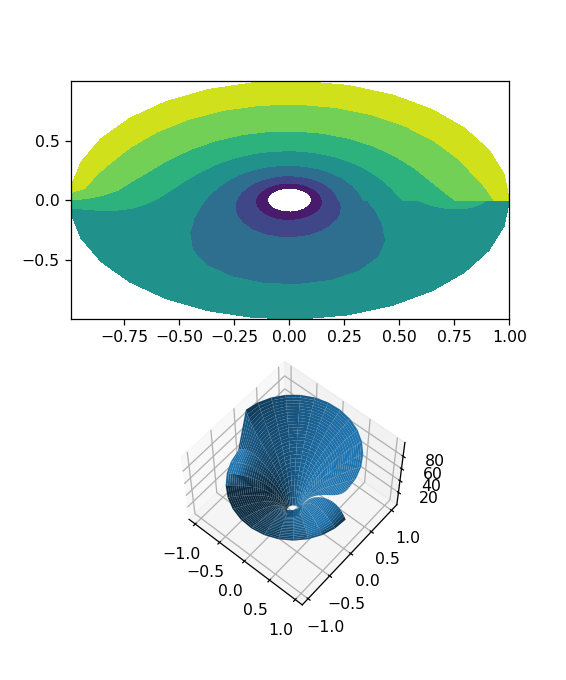

In [60]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212, projection='3d')

R, Phi = np.meshgrid(r,phi)

X,Y = R*np.cos(Phi),R*np.sin(Phi)


c = ax.contourf(X,Y,T.T)

ax1.plot_surface(X,Y,T.T)